In [1]:
# so kernel doesn't have to be restarted
%load_ext autoreload
%autoreload 2

# sklearn imports
from sklearn.neighbors import NearestNeighbors, KNeighborsTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# imodels imports
from imodels import get_clean_dataset
from imodels.tree.rf_plus.rf_plus.rf_plus_models import RandomForestPlusClassifier
from imodels.tree.rf_plus.feature_importance.rfplus_explainer import RFPlusMDI

# data getters
from ucimlrepo import fetch_ucirepo
import openml

# local feature importance
import shap
import lime

# helper scripts
from knn_helper import *

In [2]:
data_id = [43, 9978, 361062, 361063, 361069, 361071]

In [3]:
for id in data_id:
    X = pd.read_csv(f"data/{id}/X.csv")
    print(f"Dataset {id} loaded with shape {X.shape}")

Dataset 43 loaded with shape (999, 57)
Dataset 9978 loaded with shape (999, 72)
Dataset 361062 loaded with shape (999, 26)
Dataset 361063 loaded with shape (999, 16)
Dataset 361069 loaded with shape (999, 24)
Dataset 361071 loaded with shape (999, 54)


In [4]:
# set params
k = 1
data_id = 361063
data_ids = [43, 9978, 361062, 361063, 361069, 361071]
nbr_dist = "l1"
cfact_dist = "l1"
use_preds = False

In [5]:
raw_distances, shap_distances, lime_distances, lmdi_distances, \
lmdi_noraw_distances, mdi_vals, shap_vals, lime_vals, lmdi_vals,\
lmdi_noraw_vals = perform_pipeline(k, data_id, nbr_dist, cfact_dist, use_preds,
                                   coord_dist=True, weight_by_imp=False)

Data Retrieved


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear

Models Fit
LFI Values Retrieved
Opposite Neighbors Found Using 'l1' Distance
Average Distances Calculated


In [8]:
raw_distances[0,:]

array([0.06744655, 0.1477057 , 0.02077606, 0.52835272, 0.4042428 ,
       0.21496481, 0.        , 0.32779634, 0.        , 0.6439085 ,
       0.56433789, 0.01950702, 0.09494501, 0.38974434, 0.00924361,
       1.69575341])

In [12]:
lmdi_distances

array([[0.00724059, 0.43810704, 0.        , ..., 0.75326015, 1.14497778,
        1.76261173],
       [0.00724059, 0.22851133, 0.41184313, ..., 0.30680656, 0.55760007,
        0.19267493],
       [0.00190933, 1.42332248, 0.        , ..., 0.11835819, 0.74969289,
        1.58634929],
       ...,
       [0.01105925, 1.22077593, 0.        , ..., 0.06584489, 0.89046207,
        0.        ],
       [0.02836723, 0.69743431, 0.1262885 , ..., 0.73287658, 0.65275806,
        0.04665774],
       [0.03769071, 0.15304148, 0.003025  , ..., 0.43206209, 0.03255522,
        0.26439376]])

In [13]:
lmdi_distances.shape

(500, 16)

In [16]:
lmdi_distances.reshape(-1)

array([0.00724059, 0.43810704, 0.        , ..., 0.43206209, 0.03255522,
       0.26439376])

In [15]:
lmdi_vals.shape

(500, 16)

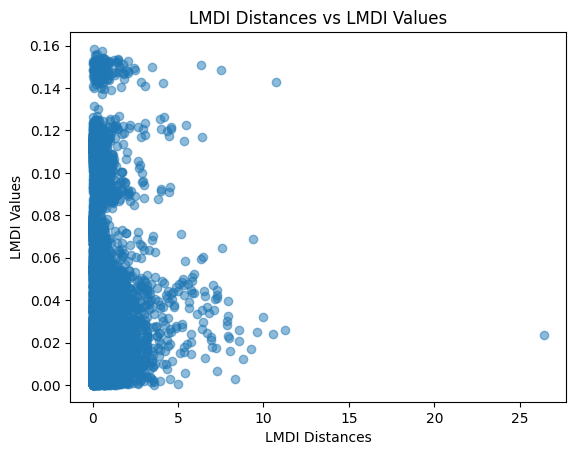

In [22]:
plt.scatter(lime_distances.reshape(-1), lime_vals.reshape(-1), alpha=0.5)
plt.xlabel("LMDI Distances")
plt.ylabel("LMDI Values")
plt.title("LMDI Distances vs LMDI Values")
plt.show()

In [11]:
raw_distances[0,:] - lmdi_distances[0,:]

array([ 0.06020596, -0.29040135,  0.02077606, -0.12768152,  0.11510412,
        0.13833815,  0.        ,  0.10072613, -0.87268707,  0.26322591,
       -0.02610733,  0.01950702,  0.09494501, -0.36351581, -1.13573417,
       -0.06685832])

In [10]:
mdi_vals

array([0.09925933, 0.03347186, 0.09793956, 0.03460258, 0.10441431,
       0.02949989, 0.02007889, 0.02773373, 0.02394211, 0.10767577,
       0.10611552, 0.09178196, 0.09909557, 0.05376824, 0.03326007,
       0.0373606 ])